<a href="https://colab.research.google.com/github/SBGitHub21/Sharing_Work/blob/master/Predict_the_Spread_of_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Collection and Preprocessing

In [0]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Covid_Data/novel-corona-virus-2019-dataset/covid_19_data.csv',parse_dates=['Last Update'],index_col=0) 
#parsing according to the last update datetime column
#serial number as index
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
#renaming certain columns

In [0]:
#used for Map later
df_confirmed = pd.read_csv("/content/drive/My Drive/Covid_Data/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = df.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

### Exploratory Data Analysis (EDA)

In [4]:
print("Rows : ",df.shape[0])
print("\nColumns : ",df.shape[1])
print("\nFeatures : ",df.columns.tolist())
print("\nMissing Values : ",df.isnull().sum().sum())
print("\nUnique values : \n", df.nunique())

Rows :  10358

Columns :  7

Features :  ['Date', 'Province/State', 'Country', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']

Missing Values :  4780

Unique values : 
 Date                69
Province/State     293
Country            213
Last Update       1812
Confirmed         1466
Deaths             306
Recovered          729
dtype: int64


In [5]:
df.info() #information about the datatypes 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 1 to 10358
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            10358 non-null  object        
 1   Province/State  5578 non-null   object        
 2   Country         10358 non-null  object        
 3   Last Update     10358 non-null  datetime64[ns]
 4   Confirmed       10358 non-null  float64       
 5   Deaths          10358 non-null  float64       
 6   Recovered       10358 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 647.4+ KB


In [6]:
print("Basic Statistics : \n",df.describe()) #metrics

Basic Statistics : 
            Confirmed        Deaths     Recovered
count   10358.000000  10358.000000  10358.000000
mean      941.068160     37.830952    281.068836
std      6036.323228    371.916696   2972.773363
min         0.000000      0.000000      0.000000
25%         3.000000      0.000000      0.000000
50%        29.000000      0.000000      0.000000
75%       210.000000      2.000000     13.000000
max    101739.000000  11591.000000  62889.000000


In [7]:
print("Earliest Cases : \n",df.head()) 

Earliest Cases : 
            Date Province/State         Country  ... Confirmed  Deaths  Recovered
SNo                                             ...                             
1    01/22/2020          Anhui  Mainland China  ...       1.0     0.0        0.0
2    01/22/2020        Beijing  Mainland China  ...      14.0     0.0        0.0
3    01/22/2020      Chongqing  Mainland China  ...       6.0     0.0        0.0
4    01/22/2020         Fujian  Mainland China  ...       1.0     0.0        0.0
5    01/22/2020          Gansu  Mainland China  ...       0.0     0.0        0.0

[5 rows x 7 columns]


In [8]:
print("Latest Cases : \n",df.tail())

Latest Cases : 
              Date Province/State         Country  ... Confirmed  Deaths  Recovered
SNo                                               ...                             
10354  03/30/2020        Wyoming              US  ...      94.0     0.0        0.0
10355  03/30/2020       Xinjiang  Mainland China  ...      76.0     3.0       73.0
10356  03/30/2020          Yukon          Canada  ...       4.0     0.0        0.0
10357  03/30/2020         Yunnan  Mainland China  ...     180.0     2.0      172.0
10358  03/30/2020       Zhejiang  Mainland China  ...    1255.0     1.0     1225.0

[5 rows x 7 columns]


In [9]:
print("\n\t\t Date-wise number of cases in each category\n")
df.groupby('Date').sum()
#total number of Confirmed cases , Deaths and Recovery per day.


		 Date-wise number of cases in each category



,Confirmed,Deaths,Recovered
Date,,,
01/22/2020,555.0,17.0,28.0
01/23/2020,653.0,18.0,30.0
01/24/2020,941.0,26.0,36.0
01/25/2020,1438.0,42.0,39.0
01/26/2020,2118.0,56.0,52.0
...,...,...,...
03/26/2020,529591.0,23970.0,122150.0
03/27/2020,593291.0,27198.0,130915.0
03/28/2020,660706.0,30652.0,139415.0


In [10]:
print("\n\t\tMaximum number of Confirmed,Deaths and Recovered Cases\n")
df1 = df.groupby(['Country', 'Province/State'])['Confirmed', 'Deaths', 'Recovered'].max()
df1 = df.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
df1 = df1[df1['Date']==max(df1['Date'])].reset_index(drop=True)
df1.style.background_gradient(cmap='Pastel1')


		Maximum number of Confirmed,Deaths and Recovered Cases



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Confirmed,Deaths,Recovered
0,03/30/2020,782365.000000,37582.000000,164566.000000


In [11]:
print("\n\t\tWorld View - Country wise\n")
df_grouped = df.groupby('Country')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
df2 = df_grouped.sort_values(by='Confirmed', ascending=False)
df2 = df2.reset_index(drop=True)
df2.style.background_gradient(cmap='summer')
#Maximum number of cases in China followed by Italy and Iran


		World View - Country wise



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Country,Confirmed,Deaths,Recovered
0,Mainland China,4094720.000000,142338.000000,2306825.000000
1,Italy,1105297.000000,104101.000000,130395.000000
2,US,899280.000000,14330.000000,12428.000000
3,Spain,646609.000000,46099.000000,84005.000000
4,Germany,516949.000000,3101.000000,52328.000000
5,Iran,482959.000000,31473.000000,158187.000000
6,France,357338.000000,17811.000000,43533.000000
7,South Korea,247232.000000,2520.000000,49119.000000
8,UK,140245.000000,7329.000000,1962.000000
9,Switzerland,138532.000000,2133.000000,7244.000000


In [12]:
print("\n\t\tChina \n")
China = df.query('Country=="Mainland China"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
China
#Exploring data of china


		China 



,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 17:00:00,547.0,17.0,28.0
1,2020-01-23 17:00:00,639.0,18.0,30.0
2,2020-01-24 17:00:00,916.0,26.0,36.0
3,2020-01-25 17:00:00,1399.0,42.0,39.0
4,2020-01-26 16:00:00,2062.0,56.0,49.0
...,...,...,...,...
788,2020-03-26 23:53:24,81298.0,3287.0,74061.0
789,2020-03-27 23:27:48,81345.0,3292.0,74600.0
790,2020-03-28 23:11:06,81401.0,3295.0,74978.0
791,2020-03-29 23:14:06,81444.0,3300.0,75460.0


In [13]:
print("\n\t\tCountry Wise - Sorted(Alphabetically) order\n")
df.groupby("Country")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()



		Country Wise - Sorted(Alphabetically) order



,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,1051.0,25.0,21.0
3,Albania,1989.0,76.0,189.0
4,Algeria,4112.0,280.0,548.0
...,...,...,...,...
208,Vietnam,2718.0,0.0,760.0
209,West Bank and Gaza,498.0,5.0,88.0
210,Zambia,159.0,0.0,0.0
211,Zimbabwe,45.0,8.0,0.0


### Visualisation

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [15]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=deaths['Date'],
                y=deaths['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=recovered['Date'],
                y=recovered['Recovered'],
                name='Recovered',
                marker_color='Green'
                ))

fig.update_layout(title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Bar Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()
#steep rise in confirmed cases around 12th March 2020. Reason could be more tests and results 
#available 

In [0]:
n = 5
c_lrgst = df_grouped.Confirmed.nlargest(n)
d_lrgst = df_grouped.Deaths.nlargest(n)
r_lrgst = df.Recovered.nlargest(n)

top_5 = df_grouped.query('Confirmed in @c_lrgst')

In [17]:
fig = go.Figure()   
fig.add_trace(go.Scatter(x=top_5['Country'], 
                         y=top_5['Confirmed'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=top_5['Country'], 
                         y=top_5['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='Red', width=2)
                        ))
fig.add_trace(go.Scatter(x=top_5['Country'], 
                         y=top_5['Recovered'],
                         mode='lines+markers',
                         name='Recovered',
                         line=dict(color='Green', width=2)
                        ))
fig.update_layout(
    title='Top 5 Countries with Corona Virus Cases (Line Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()
#China cases far more than the other top 5 countries

In [18]:
import plotly.graph_objects as go
import numpy as np
z = np.random.poisson(size=(len(China['Confirmed']), len(China['Last Update'])))

fig = go.Figure(data=go.Heatmap(
        z=z,
        x=China['Last Update'],
        y=China['Confirmed'],
        colorscale='fall'))

fig.update_layout(
    title='China - Number of Cases per day',
    xaxis_nticks=5)

fig.show()

#Cases are still increasing . No notion of decrease till now.

In [19]:
import plotly.express as px
fig = px.density_mapbox(df_latlong, 
                        lat="Lat", 
                        lon="Long", 
                        hover_name="Province/State", 
                        hover_data=["Confirmed","Deaths","Recovered"], 
                        animation_frame="Date",
                        color_continuous_scale="Portland",
                        radius=7, 
                        zoom=1,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered',
                  font=dict(family="Courier New, monospace",
                            size=14,
                            color="#7f7f7f")
                 )
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}) #tight layout - right , top, left , below


fig.show()
#trend of spread and at what rate. Huge jump in March

### Forecasting / Prediction

#### Prophet Algorithm

#### Worldwide - Confirmed Cases

In [0]:
from fbprophet import Prophet

In [21]:
#Fixing data for forecasting
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed['cap']= 10000000
confirmed.head()

,ds,y,cap
0,2020-01-22,555.0,10000000
1,2020-01-23,653.0,10000000
2,2020-01-24,941.0,10000000
3,2020-01-25,1438.0,10000000
4,2020-01-26,2118.0,10000000


In [22]:
m = Prophet(interval_width=0.95,growth = 'logistic',n_changepoints=5)
m.fit(confirmed)
future = m.make_future_dataframe(periods=200)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
264,2020-10-12
265,2020-10-13
266,2020-10-14
267,2020-10-15
268,2020-10-16


In [23]:
future['cap']=10000000
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
264,2020-10-12,1.000201e+07,9.936556e+06,1.006058e+07
265,2020-10-13,9.996829e+06,9.939842e+06,1.006108e+07
266,2020-10-14,9.996598e+06,9.934094e+06,1.006045e+07
267,2020-10-15,9.998782e+06,9.932817e+06,1.006512e+07
268,2020-10-16,1.000117e+07,9.932213e+06,1.006652e+07


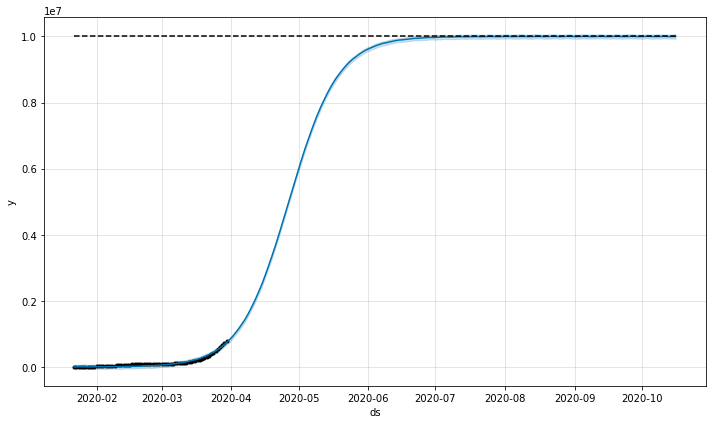

In [24]:
fig = m.plot(forecast)

In [0]:
#help(Prophet)

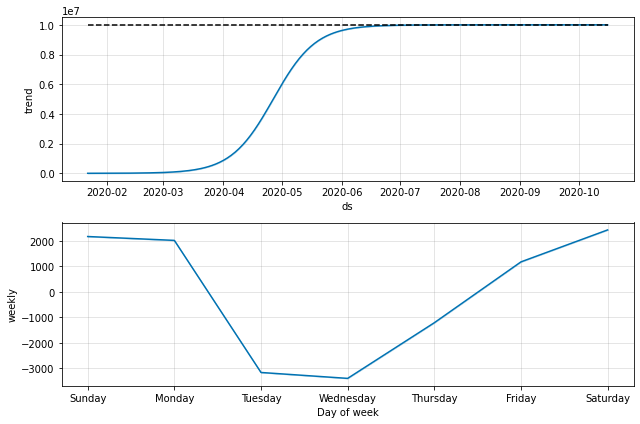

In [25]:
m.plot_components(forecast);

#### Worldwide - Deaths

In [26]:
#fixing data
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
deaths['cap']= 10000000
deaths.head()

,ds,y,cap
0,2020-01-22,17.0,10000000
1,2020-01-23,18.0,10000000
2,2020-01-24,26.0,10000000
3,2020-01-25,42.0,10000000
4,2020-01-26,56.0,10000000


In [27]:
m1 = Prophet(interval_width=0.95,growth = 'logistic',n_changepoints=5)
m1.fit(deaths)
future = m1.make_future_dataframe(periods=200)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
264,2020-10-12
265,2020-10-13
266,2020-10-14
267,2020-10-15
268,2020-10-16


In [28]:
future['cap']=10000000
forecast = m1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
264,2020-10-12,9.999979e+06,9.867133e+06,1.000079e+07
265,2020-10-13,1.000001e+07,9.873123e+06,1.000079e+07
266,2020-10-14,9.999971e+06,9.879626e+06,1.000083e+07
267,2020-10-15,9.999963e+06,9.887806e+06,1.000076e+07
268,2020-10-16,1.000002e+07,9.894028e+06,1.000093e+07


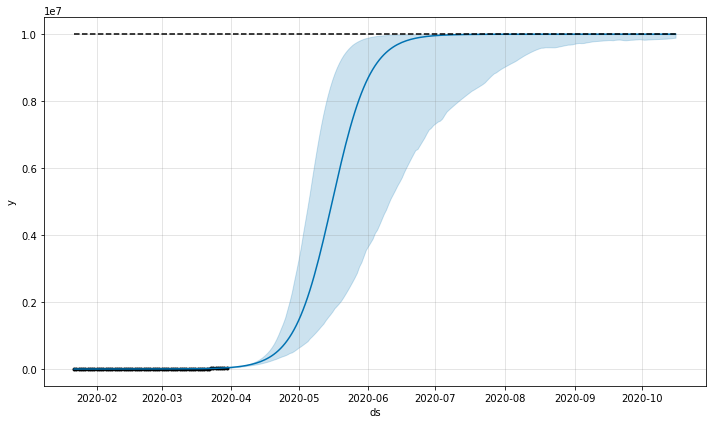

In [29]:
fig = m1.plot(forecast)

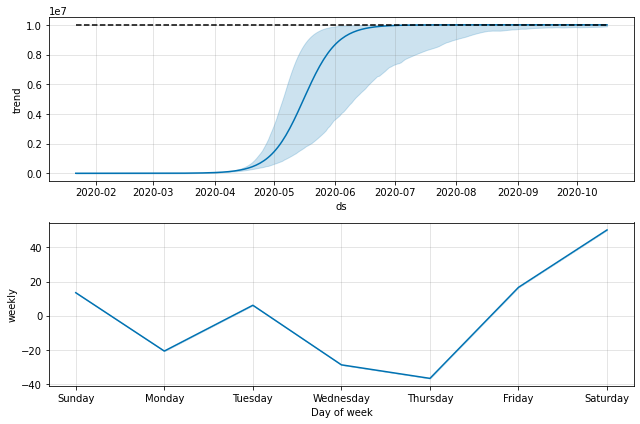

In [30]:
m1.plot_components(forecast);

#### Worldwide - Recovery

In [32]:
#fixing data
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])
recovered['cap']= 10000000
recovered.head()

,ds,y,cap
0,2020-01-22,28.0,10000000
1,2020-01-23,30.0,10000000
2,2020-01-24,36.0,10000000
3,2020-01-25,39.0,10000000
4,2020-01-26,52.0,10000000


In [33]:
m2 = Prophet(interval_width=0.95,growth = 'logistic',n_changepoints=5)
m2.fit(recovered)
future = m2.make_future_dataframe(periods=200)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
264,2020-10-12
265,2020-10-13
266,2020-10-14
267,2020-10-15
268,2020-10-16


In [34]:
future['cap']=10000000
forecast = m2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
264,2020-10-12,9.976472e+06,9.964411e+06,9.990223e+06
265,2020-10-13,9.976958e+06,9.963887e+06,9.989932e+06
266,2020-10-14,9.977638e+06,9.964049e+06,9.991731e+06
267,2020-10-15,9.978742e+06,9.965515e+06,9.991418e+06
268,2020-10-16,9.979810e+06,9.967026e+06,9.992994e+06


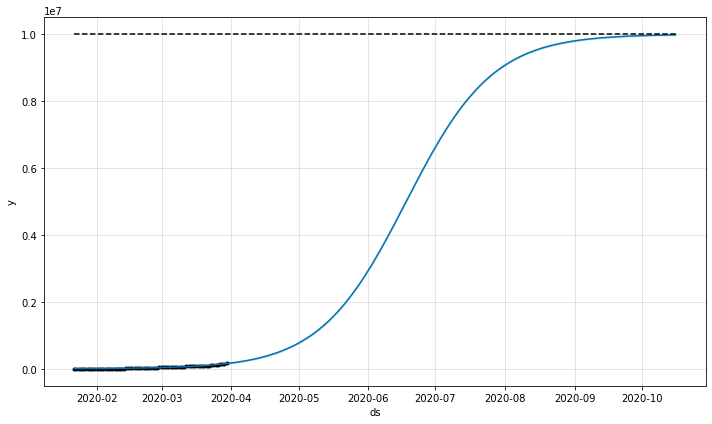

In [35]:
fig = m2.plot(forecast)

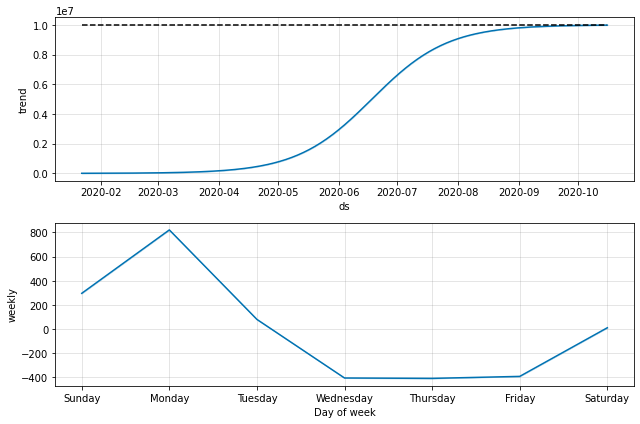

In [36]:
m2.plot_components(forecast);

### Evaluation

#### Confirmed cases 

In [41]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m,initial='20 days', period='20 days', horizon = '40 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-02-19 00:00:00 and 2020-02-19 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-02-20,100991.818195,89182.280895,111545.675192,76199.0,2020-02-19
1,2020-02-21,111332.420592,99683.571557,122966.517972,76843.0,2020-02-19
2,2020-02-22,121233.414928,110364.550620,132857.876919,78599.0,2020-02-19
3,2020-02-23,132699.299352,121811.120023,143377.509559,78985.0,2020-02-19
4,2020-02-24,144483.554975,133406.043906,156069.235010,79570.0,2020-02-19


In [42]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,4 days,1.626781e+09,40333.370979,38907.738267,0.499171,0.495630,0.0
1,5 days,2.526552e+09,50264.821306,48937.922462,0.621780,0.611243,0.0
2,6 days,3.722329e+09,61010.894026,59636.261933,0.749835,0.747931,0.0
3,7 days,5.237282e+09,72369.068656,71166.485582,0.886828,0.888427,0.0
4,8 days,7.539381e+09,86829.611076,85230.663199,1.049028,1.025725,0.0


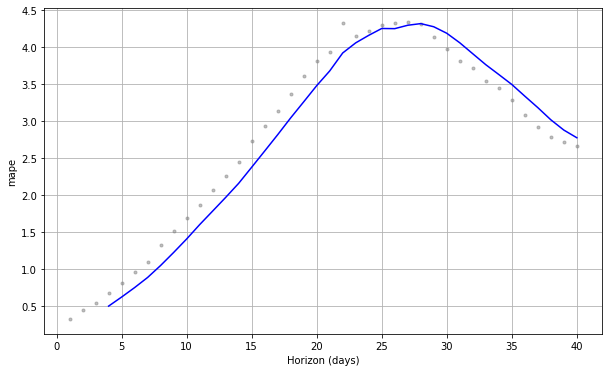

In [43]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

#### Deaths

In [44]:
df_cv = cross_validation(m1, initial='20 days', period='25 days', horizon = '40 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-02-19 00:00:00 and 2020-02-19 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-02-20,2616.841892,2437.434995,2800.266705,2247.0,2020-02-19
1,2020-02-21,2915.516965,2727.606818,3110.107290,2251.0,2020-02-19
2,2020-02-22,3240.633656,3058.579777,3428.124908,2458.0,2020-02-19
3,2020-02-23,3600.985779,3423.079258,3794.281833,2469.0,2020-02-19
4,2020-02-24,3985.927130,3786.155319,4173.169420,2629.0,2020-02-19


In [45]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,4 days,6.180683e+05,786.173179,737.244573,0.309171,0.306806,0.0
1,5 days,1.044185e+06,1021.853864,984.015883,0.397057,0.388441,0.0
2,6 days,1.666658e+06,1290.991145,1245.925342,0.481320,0.487309,0.0
3,7 days,2.587993e+06,1608.724014,1568.548627,0.588824,0.574198,0.0
4,8 days,4.020817e+06,2005.197614,1947.589278,0.709470,0.690340,0.0


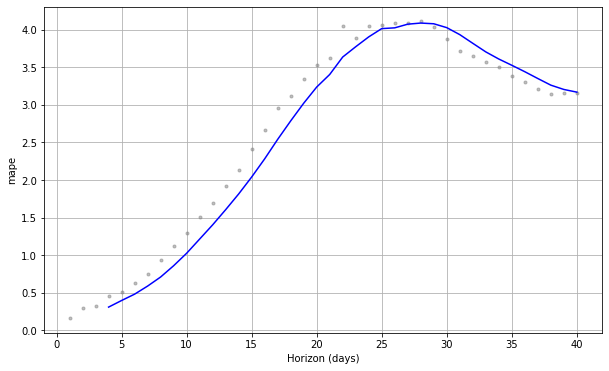

In [46]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

#### Recovery

In [47]:
df_cv = cross_validation(m2, initial='20 days', period='25 days', horizon = '40 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-02-19 00:00:00 and 2020-02-19 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-02-20,20289.669156,19525.153863,21060.430271,18177.0,2020-02-19
1,2020-02-21,24236.351791,23488.972716,24993.043613,18890.0,2020-02-19
2,2020-02-22,28709.265538,27937.209255,29440.711181,22886.0,2020-02-19
3,2020-02-23,33985.568569,33216.560779,34763.314007,23394.0,2020-02-19
4,2020-02-24,40195.744060,39416.218925,40939.013485,25227.0,2020-02-19


In [48]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,4 days,4.478465e+07,6692.133343,5968.463763,0.276612,0.268736,0.0
1,5 days,9.968463e+07,9984.219079,9182.482490,0.395895,0.367886,0.0
2,6 days,1.883035e+08,13722.373144,12738.868163,0.500483,0.523055,0.0
3,7 days,3.431981e+08,18525.607786,17673.909008,0.647208,0.647369,0.0
4,8 days,5.914763e+08,24320.285500,23337.507018,0.783788,0.771360,0.0


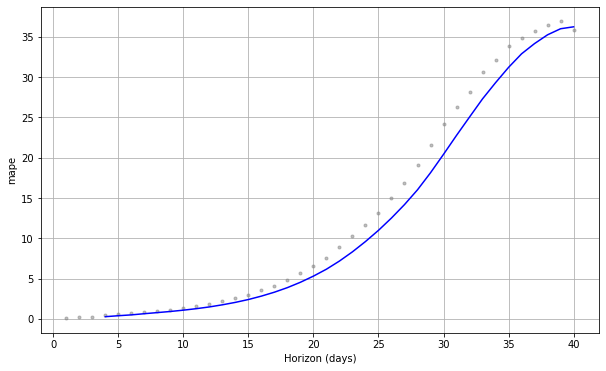

In [49]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

# Clustering

In [50]:
temp1 =df.groupby('Country')['Confirmed','Deaths','Recovered'].sum().reset_index()
temp = temp1.set_index(['Country'])
temp.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Confirmed,Deaths,Recovered
Country,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,1051.0,25.0,21.0
Albania,1989.0,76.0,189.0
Algeria,4112.0,280.0,548.0


In [0]:
from scipy.cluster.hierarchy import dendrogram , linkage
z = linkage(temp,'ward')

In [52]:
import plotly.figure_factory as ff
names = df['Country']
fig = ff.create_dendrogram(z,labels = temp.index,color_threshold=240)
fig.update_layout(width=2500, height=800)
fig.show()